<a href="https://colab.research.google.com/github/withopenWaigua/TensforflowStudy/blob/main/Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_fileile('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

228827136/228813984 [==============================] - 5s 0us/step


In [13]:
data_dir.glob('roses/*')

<generator object Path.glob at 0x7fb3fdeb06d0>

In [3]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


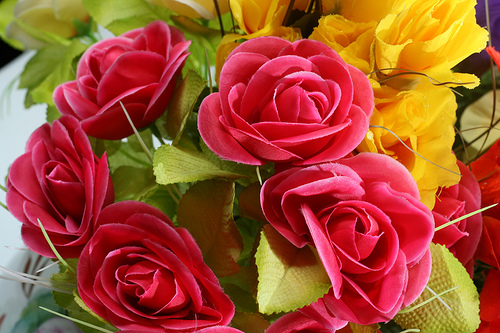

In [4]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

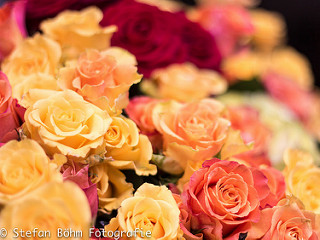

In [5]:
PIL.Image.open(str(roses[1]))

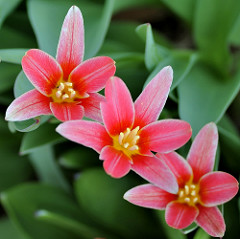

In [6]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

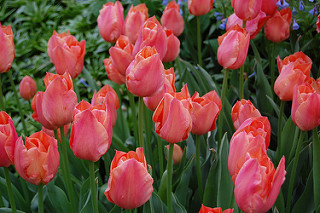

In [7]:
PIL.Image.open(str(tulips[1]))

In [8]:
batch_size = 32
img_height = 180
img_width = 180

In [9]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [10]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [11]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


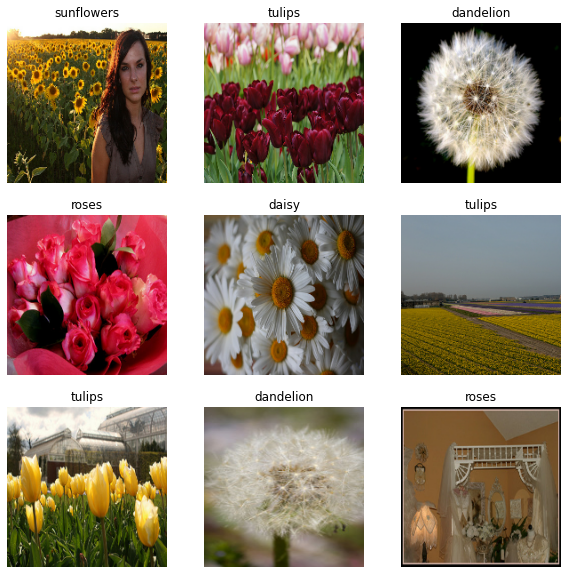

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [19]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [20]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [21]:
normalization_layer = layers.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 0.8974994


In [23]:
next(iter(normalized_ds))

(<tf.Tensor: shape=(32, 180, 180, 3), dtype=float32, numpy=
 array([[[[1.70370370e-01, 1.81135327e-01, 1.80950150e-01],
          [1.79931030e-01, 1.71354398e-01, 1.80918664e-01],
          [1.59408152e-01, 1.77495778e-01, 1.75326809e-01],
          ...,
          [2.92481333e-01, 3.08885217e-01, 3.01735640e-01],
          [2.83961684e-01, 2.98311472e-01, 3.05722922e-01],
          [2.82055020e-01, 2.90010810e-01, 2.97017545e-01]],
 
         [[1.67254910e-01, 1.73994198e-01, 1.70486569e-01],
          [1.85479313e-01, 1.74335524e-01, 1.85958624e-01],
          [1.57737851e-01, 1.76496014e-01, 1.74673200e-01],
          ...,
          [2.80787885e-01, 3.14321250e-01, 2.79644132e-01],
          [2.67897755e-01, 2.95631558e-01, 2.93769360e-01],
          [2.59004921e-01, 2.92578161e-01, 2.84284681e-01]],
 
         [[1.68724298e-01, 1.82964176e-01, 1.62012830e-01],
          [1.67102426e-01, 1.88997820e-01, 1.67084262e-01],
          [1.66236997e-01, 1.84961274e-01, 1.49661094e-01],
    

In [24]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [25]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [27]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
92/92 [==============================] - 76s 824ms/step - loss: 1.3461 - accuracy: 0.4346 - val_loss: 1.0992 - val_accuracy: 0.5531
Epoch 2/10
92/92 [==============================] - 74s 804ms/step - loss: 0.9756 - accuracy: 0.6175 - val_loss: 0.9699 - val_accuracy: 0.6335
Epoch 3/10
92/92 [==============================] - 74s 807ms/step - loss: 0.8028 - accuracy: 0.6986 - val_loss: 0.8968 - val_accuracy: 0.6322
Epoch 4/10
92/92 [==============================] - 74s 806ms/step - loss: 0.5885 - accuracy: 0.7844 - val_loss: 0.8930 - val_accuracy: 0.6703
Epoch 5/10
92/92 [==============================] - 74s 802ms/step - loss: 0.3839 - accuracy: 0.8682 - val_loss: 0.9172 - val_accuracy: 0.6594
Epoch 6/10
92/92 [==============================] - 74s 810ms/step - loss: 0.2325 - accuracy: 0.9193 - val_loss: 1.3488 - val_accuracy: 0.6049
Epoch 7/10
92/92 [==============================] - 74s 802ms/step - loss: 0.1314 - accuracy: 0.9619 - val_loss: 1.2575 - val_accuracy: 0.6635

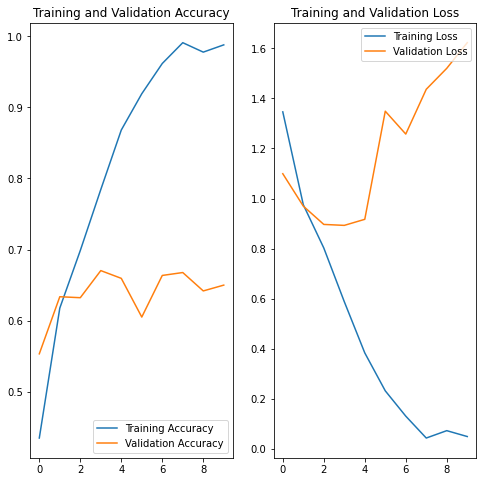

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

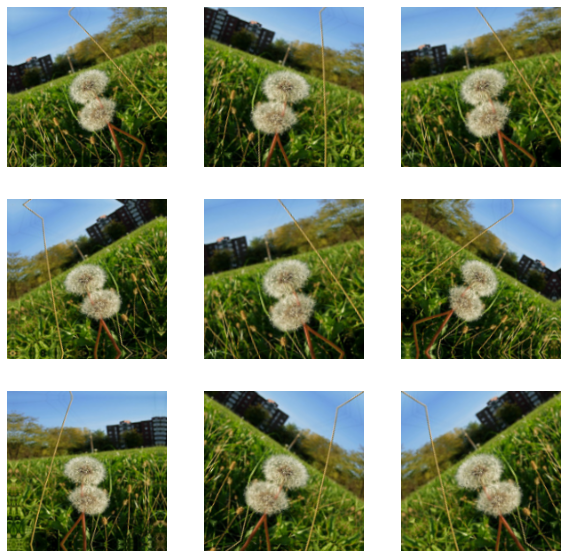

In [30]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [31]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [32]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

In [34]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
92/92 [==============================] - 88s 944ms/step - loss: 1.2839 - accuracy: 0.4571 - val_loss: 1.0553 - val_accuracy: 0.5913
Epoch 2/15
92/92 [==============================] - 87s 947ms/step - loss: 1.0224 - accuracy: 0.6008 - val_loss: 0.9600 - val_accuracy: 0.6226
Epoch 3/15
92/92 [==============================] - 87s 944ms/step - loss: 0.9207 - accuracy: 0.6393 - val_loss: 0.8923 - val_accuracy: 0.6676
Epoch 4/15
92/92 [==============================] - 87s 942ms/step - loss: 0.8680 - accuracy: 0.6645 - val_loss: 0.8402 - val_accuracy: 0.6730
Epoch 5/15
92/92 [==============================] - 86s 932ms/step - loss: 0.8037 - accuracy: 0.6870 - val_loss: 0.8017 - val_accuracy: 0.6962
Epoch 6/15
92/92 [==============================] - 86s 933ms/step - loss: 0.7681 - accuracy: 0.7044 - val_loss: 0.7957 - val_accuracy: 0.6826
Epoch 7/15
92/92 [==============================] - 86s 935ms/step - loss: 0.7521 - accuracy: 0.7136 - val_loss: 0.7416 - val_accuracy: 0.7030

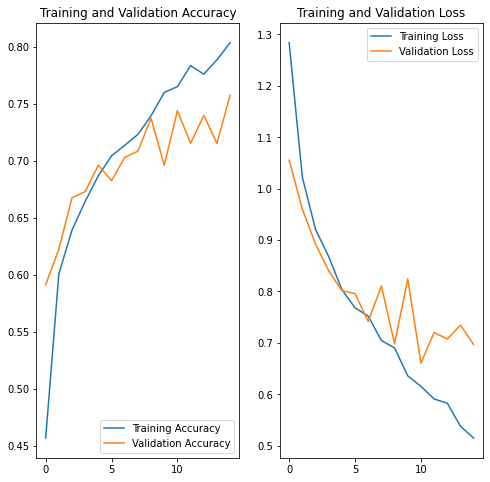

In [35]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [36]:
sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

131072/117948 [=================================] - 0s 0us/step
This image most likely belongs to sunflowers with a 72.80 percent confidence.
